In [ ]:
#1. Bckground- Nave Bayes is a family of probilistic classifer. It works on the assumption that all attribiutes to be 
#conditionally independent.It describes the probability of an event happening.

#Card Express, a USA based company, provides credit card services to its customers.
#Various customers had dispute against the company because fradusters were stealing their money (credits).
#After looking into the problem they found some unexpected loopholes in their security measures.
#They decided to rectify the shortcomings of securing the credits of their potential customers
#There are chances that fraudsters might try to crack inside the company's interface and can commit fraudulent transactions.
#It may harm people's trust towards the company and they might loose their potential customers.


In [ ]:
#2. Objective of study- 
#To develop an automated solution to identify the likeliness of customer being 
#fraudulent or not.

In [ ]:
#3 . Importing the files

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
#4. Data Acquisition and description


In [ ]:
#4.1 Data Description
#The data set is based on the credit-card transactions made in September 2013 by European cardholders.
#This data set presents transactions that occurred in two days

#Id	Features	Description
#01	Time	Seconds elapsed between each transaction and the first transaction in the dataset. Range:[0, 15012]
#02	V1...V28	Encrypted information of the credit details.
#03	Amount	The transaction amount peformed by the credit holder. Range: [0, 7712.43]
#04	Class	Label explaining fraudulent and non-fraudulent transactions. [0: Non-fraudulent, 1: Fraudulent]


In [7]:
#4.2 Data Acquisition

data = pd.read_csv("https://raw.githubusercontent.com/ingledarshan/INSAID/main/credit_fraud.csv")

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5966.033400,-0.241862,0.281949,0.906270,0.264148,-0.046398,0.133108,-0.071689,-0.064778,0.802224,...,-0.051990,-0.152671,-0.033268,0.021335,0.087146,0.108140,0.005518,0.002915,63.030188,0.00380
std,4473.403739,1.521679,1.308139,1.159154,1.441235,1.182935,1.307311,1.077430,1.259064,1.155198,...,0.913811,0.631083,0.487814,0.594430,0.428171,0.562793,0.410868,0.266247,184.486158,0.06153
min,0.000000,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,0.000000,0.00000
25%,2072.750000,-1.013283,-0.208342,0.412799,-0.614424,-0.643390,-0.629934,-0.542336,-0.190747,0.070868,...,-0.268120,-0.549638,-0.174120,-0.327817,-0.158137,-0.327974,-0.084489,-0.015753,5.000000,0.00000
50%,4563.500000,-0.372799,0.288524,0.944361,0.219861,-0.152769,-0.152566,-0.055585,0.012865,0.805275,...,-0.123273,-0.136746,-0.045794,0.079976,0.121001,0.042865,-0.004568,0.015897,15.950000,0.00000
75%,10233.250000,1.150864,0.901879,1.602903,1.125666,0.371081,0.505357,0.476280,0.274533,1.506299,...,0.032707,0.247490,0.081665,0.410877,0.359058,0.476394,0.120811,0.077182,50.960000,0.00000
max,15012.000000,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.00000


In [ ]:
#5. Data Preprocessing

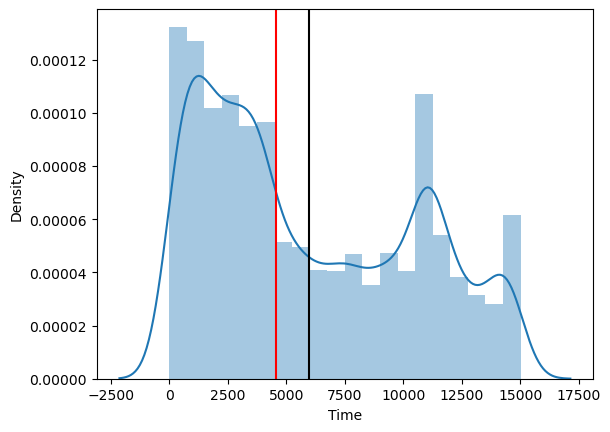

In [9]:
#5.1 Making graph on variable Time

sns.distplot(data.Time)
plt.axvline(data.Time.mean(), color='black')
plt.axvline(data.Time.median(), color='red')
plt.show()

#The data on variable time does not seems to be evenly distributed but the skewness in moderate.

In [10]:
#Checking skewness of the data
data.Time.skew()

#A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 
#A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates
#that the distribution is fairly symmetrical.

0.43865199743801486

In [12]:
#5.2 Checking the skewness of the variable 'amount' i.e. transaction amount peformed by the credit holder
data.Amount.skew()

14.5378779812731

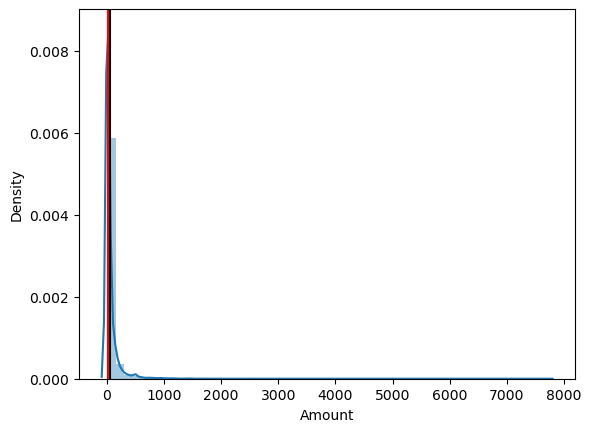

In [13]:
#Making graph on the variable 'Amount'

sns.distplot(data.Amount)
plt.axvline(data.Amount.mean(), color='black')
plt.axvline(data.Amount.median(), color='red')
plt.show()

#The amount variable data is highly skewed.

In [15]:
data.Amount.describe()

#The amount variable has lot of variation in the data from minimum value being 0 to maximum value being 7712.

count    10000.000000
mean        63.030188
std        184.486158
min          0.000000
25%          5.000000
50%         15.950000
75%         50.960000
max       7712.430000
Name: Amount, dtype: float64

In [16]:
data.Amount.quantile([0.0, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0])

0.0       0.000
0.1       1.000
0.2       3.588
0.3       7.740
0.4      12.140
0.5      15.950
0.6      25.000
0.7      39.386
0.8      68.740
0.9     149.000
1.0    7712.430
Name: Amount, dtype: float64

In [17]:
data.info()

# No variable has missing value. Only calss and amount variable is integer. All others are float.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    10000 non-null  int64  
 1   V1      10000 non-null  float64
 2   V2      10000 non-null  float64
 3   V3      10000 non-null  float64
 4   V4      10000 non-null  float64
 5   V5      10000 non-null  float64
 6   V6      10000 non-null  float64
 7   V7      10000 non-null  float64
 8   V8      10000 non-null  float64
 9   V9      10000 non-null  float64
 10  V10     10000 non-null  float64
 11  V11     10000 non-null  float64
 12  V12     10000 non-null  float64
 13  V13     10000 non-null  float64
 14  V14     10000 non-null  float64
 15  V15     10000 non-null  float64
 16  V16     10000 non-null  float64
 17  V17     10000 non-null  float64
 18  V18     10000 non-null  float64
 19  V19     10000 non-null  float64
 20  V20     10000 non-null  float64
 21  V21     10000 non-null  float64
 22 

In [36]:
#import pandas_profiling as pp
#profile = pp.ProfileReport(df=data)
#profile.to_file(output_file="Pre-Profiling Report.html")
#print("REPORT GENERATED SUCCESSFULLY!!!")

In [25]:
#5.3 Removing duplicates
data.duplicated().sum()

42

In [27]:
#removing duplicates

data.drop_duplicates(inplace=True)

In [28]:
data.duplicated().sum()

0

In [29]:
data.shape

(9958, 31)

In [37]:
#5.4 Converting time into hours

data['Time Hrs'] = data.Time/3600

In [38]:
data['Time Hrs'].describe()

count    9958.000000
mean        1.660465
std         1.242799
min         0.000000
25%         0.578194
50%         1.275972
75%         2.847500
max         4.170000
Name: Time Hrs, dtype: float64

In [ ]:
#6. Exploratory Data Analysis

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9958 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Time      9958 non-null   int64  
 1   V1        9958 non-null   float64
 2   V2        9958 non-null   float64
 3   V3        9958 non-null   float64
 4   V4        9958 non-null   float64
 5   V5        9958 non-null   float64
 6   V6        9958 non-null   float64
 7   V7        9958 non-null   float64
 8   V8        9958 non-null   float64
 9   V9        9958 non-null   float64
 10  V10       9958 non-null   float64
 11  V11       9958 non-null   float64
 12  V12       9958 non-null   float64
 13  V13       9958 non-null   float64
 14  V14       9958 non-null   float64
 15  V15       9958 non-null   float64
 16  V16       9958 non-null   float64
 17  V17       9958 non-null   float64
 18  V18       9958 non-null   float64
 19  V19       9958 non-null   float64
 20  V20       9958 non-null   floa

In [32]:
#Target Variable

data.Class.value_counts()

0    9920
1      38
Name: Class, dtype: int64

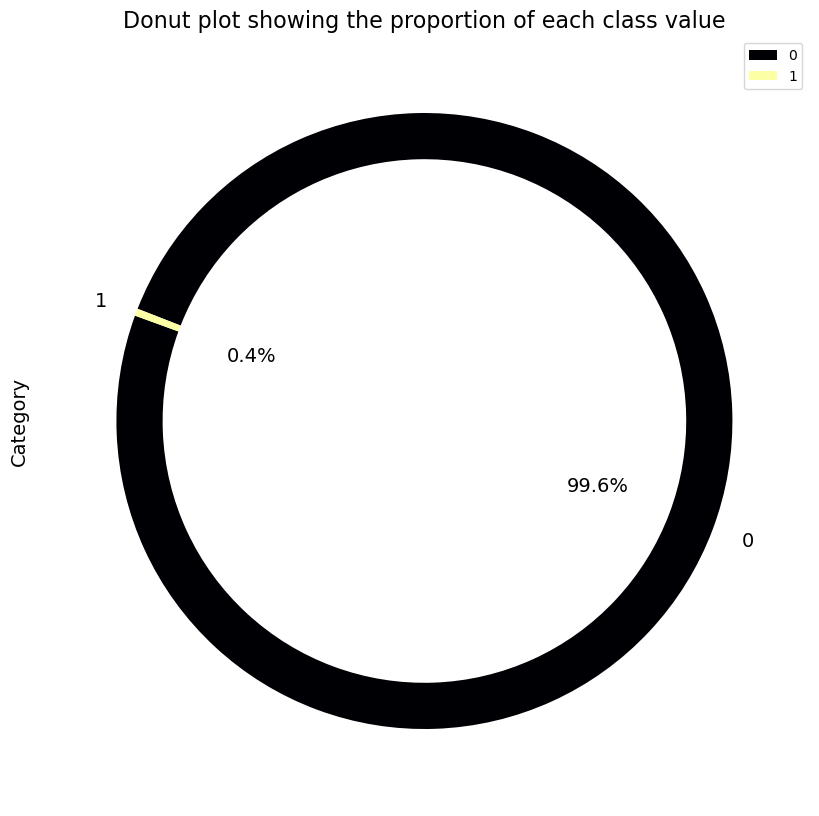

In [35]:
#6.1 Making pie chart of target variable


#Creating a custom figure size of 10 X 10 inches
figure = plt.figure(figsize=[10,10])



# Using magic of pandas pie() function
data['Class'].value_counts().plot(kind='pie', fontsize=14,
                                      autopct='%3.1f%%', wedgeprops=dict(width=0.15),
                                      startangle=160, cmap='inferno', legend=True)
plt.ylabel(ylabel='Category',size=14)
plt.title(label='Donut plot showing the proportion of each class value', size=16)
plt.show()

#0.45 of the customers were fradulant

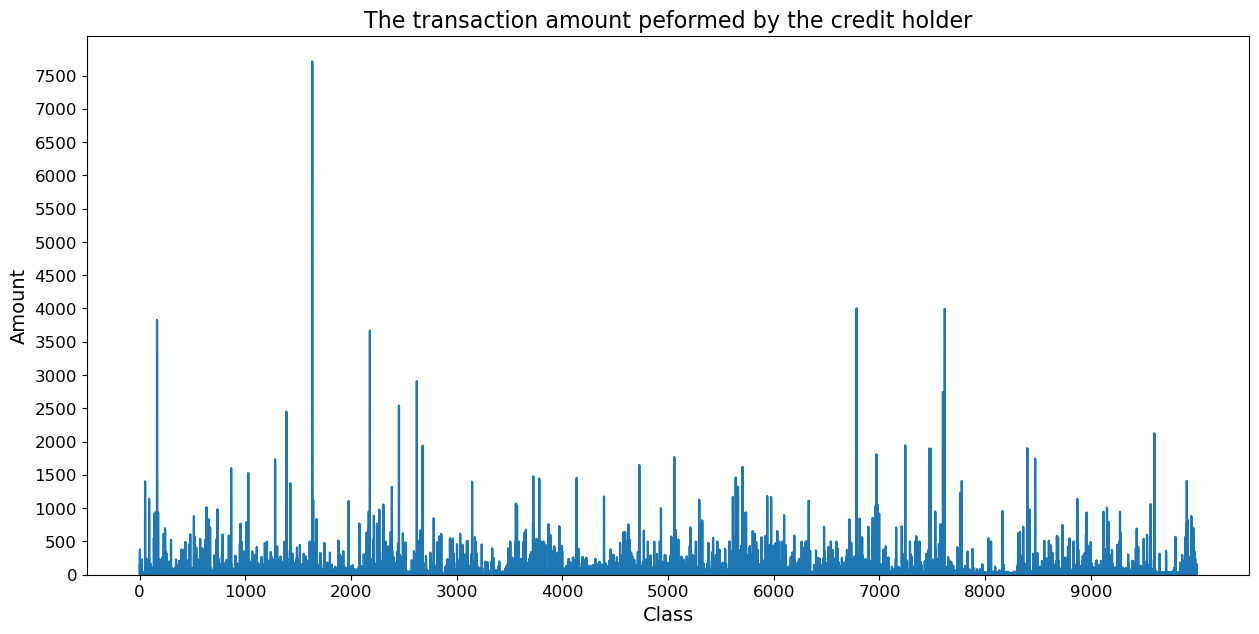

In [42]:
#6.2. Making area chart of the variable 'Amount' i.e. The transaction amount peformed by the credit holder

# Creating a custom figure size of 15 X 7 inches
figure = plt.figure(figsize=[15,7])

#Using magic of pandas area() function
data['Amount'].plot.area()

# Changing x-ticks ranging from 0 to 10000 with step size of 1000 and label size of 12
plt.xticks(ticks=np.arange(0,10000,1000), size=12)

#Changing y-ticks ranging from 0 to 8000 with step size of 500 and label size of 12
plt.yticks(ticks=np.arange(0,8000,500), size=12)

# Labelling x-axis with a custom label and size of 14
plt.xlabel(xlabel='Class', size = 14)

# Labelling y-axis with a custom label and size of 14
plt.ylabel(ylabel= 'Amount', size= 14)

# Labelling title with a custom label and size of 14
plt.title(label='The transaction amount peformed by the credit holder', size=16)

# Dispaly the output by rendering visual on the screen
plt.show()

In [51]:
#6.3 Making graphs on variable class

#separating fraudulent from non-fraudulant
nonFraud = data['Time Hrs'][data['Class']==0]
nonFraud.shape

(9920,)

In [52]:
Fraud = data['Time Hrs'][data['Class']==1]
Fraud.shape

(38,)

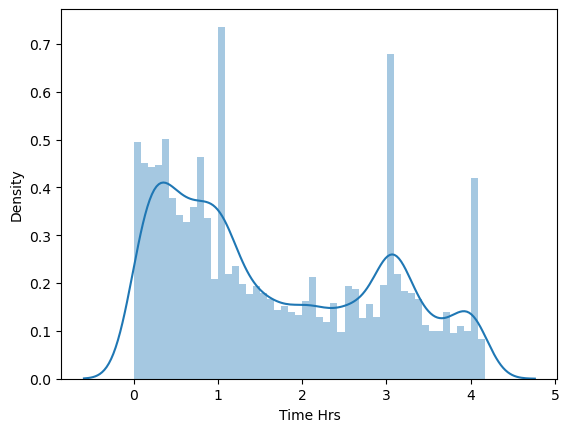

In [54]:
#making graph

sns.distplot(nonFraud, bins=50)
plt.show()

#For non-fraudulant customers time elapsed in hrs between each transaction and the first transaction was
#mostly less than 1.5 hour

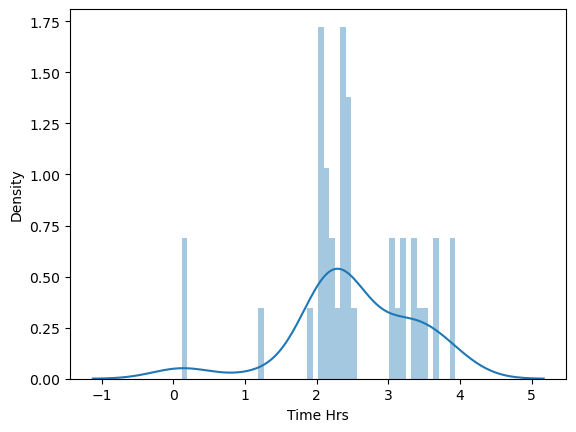

In [55]:
sns.distplot(Fraud, bins=50)
plt.show()

##For fraudulant customers 2-2.5 hours

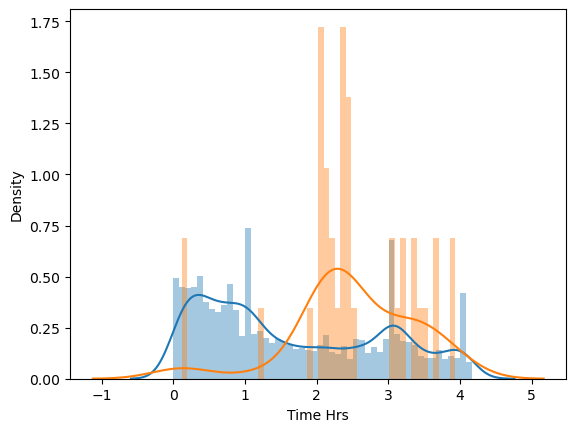

In [56]:
sns.distplot(nonFraud, bins=50)
sns.distplot(Fraud, bins=50)
plt.show()

In [ ]:
#6.5 Making graphs for amount peformed by the credit holder w.r.t. class of cutomer

In [58]:
nonFraud = data['Amount'][data['Class']==0]
Fraud = data['Amount'][data['Class']==1]

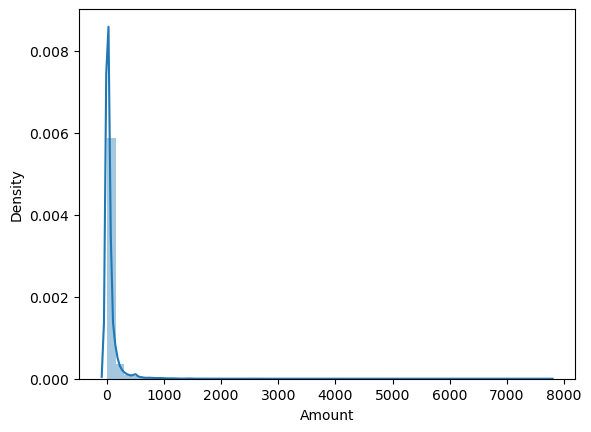

In [60]:
sns.distplot(nonFraud, bins=50)
plt.show()


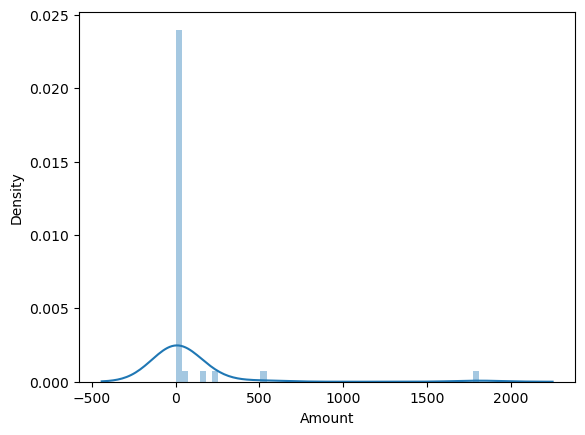

In [61]:
sns.distplot(Fraud, bins=50)
plt.show()

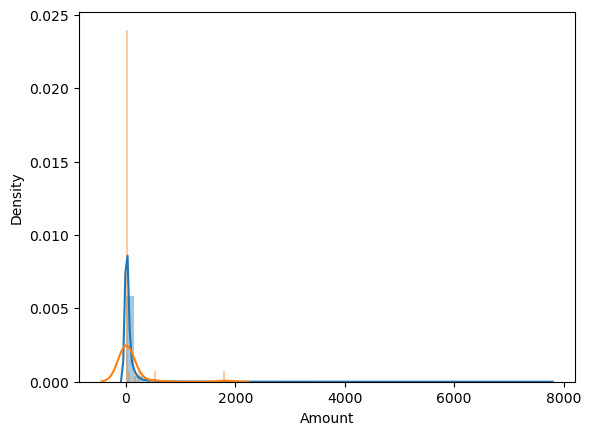

In [59]:
sns.distplot(nonFraud, bins=50)
sns.distplot(Fraud, bins=50)
plt.show()

In [63]:
#7. Data Post Processing

#7.1 Splitting the data into dependent and independent variable

X = data.drop(['Class'], axis=1)

X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time Hrs
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.000000
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000000
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.000278
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.000278
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.000556


In [65]:
y = data.Class

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [72]:
#7.2 Scaling the data

#Instantiating a standard scaler object
ss= StandardScaler()

#columns to be scaled
cols_to_be_scaled = ['Time', 'Amount', 'Time Hrs']
cols_to_be_scaled

['Time', 'Amount', 'Time Hrs']

In [73]:
#inputting our transformed data in a dataframe
X[cols_to_be_scaled] = ss.fit_transform(X[cols_to_be_scaled])

#Getting a glimpse of transformed data
X.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time Hrs
count,9.958000e+03,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,...,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9958.000000,9.958000e+03,9.958000e+03
mean,-3.389625e-15,-0.236538,0.277701,0.907547,0.262166,-0.046090,0.129989,-0.070158,-0.062741,0.801673,...,-0.055527,-0.151012,-0.033782,0.022742,0.087249,0.109350,0.007351,0.003041,-1.130180e-16,-3.410586e-15
std,1.000050e+00,1.517126,1.305447,1.159813,1.443060,1.184111,1.307762,1.077349,1.249274,1.155130,...,0.901559,0.629632,0.488118,0.593910,0.428014,0.563011,0.400708,0.266218,1.000050e+00,1.000050e+00
min,-1.336136e+00,-27.670569,-34.607649,-15.496222,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-6.329801,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.509250,-3.420093e-01,-1.336136e+00
25%,-8.708769e-01,-1.008975,-0.210679,0.413775,-0.615648,-0.642790,-0.631576,-0.541026,-0.190510,0.070212,...,-0.267739,-0.546860,-0.174192,-0.325628,-0.158241,-0.326793,-0.084394,-0.015753,-3.149576e-01,-8.708769e-01
50%,-3.093921e-01,-0.369943,0.287175,0.946572,0.218492,-0.152022,-0.155971,-0.054658,0.012466,0.806771,...,-0.123344,-0.135683,-0.045794,0.081601,0.120665,0.043418,-0.004604,0.015862,-2.557142e-01,-3.093921e-01
75%,9.551778e-01,1.151695,0.899811,1.604029,1.124974,0.370156,0.496705,0.476188,0.272495,1.506192,...,0.032506,0.247977,0.081338,0.411475,0.359460,0.481568,0.120290,0.077176,-6.352498e-02,9.551778e-01
max,2.019361e+00,1.960497,8.636214,4.101716,10.463020,34.099309,21.393069,34.303177,5.060381,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,4.138495e+01,2.019361e+00


In [78]:
# 7.3 Selecting features based on importance weights

# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html

from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=1))


#n_estimator is the number of tree in the forest. n_jobs is n_jobs is an integer, specifying the maximum number 
# of concurrently running workers.


In [79]:
selector.fit(X,y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=1, random_state=42))

In [80]:
selector

SelectFromModel(estimator=RandomForestClassifier(n_jobs=1, random_state=42))

In [81]:
X.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Time Hrs'],
      dtype='object')

In [83]:
#with this command all those True are the selected columns after the selector command
selector.get_support()

array([False, False, False,  True,  True, False, False, False, False,
        True,  True,  True,  True, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [84]:
X.columns[selector.get_support()]

#Below are the columns selected 

Index(['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V17'], dtype='object')

In [86]:
features_selected=X.columns[selector.get_support()].tolist()
features_selected

['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V17']

In [87]:
len(features_selected)

8

In [88]:
selector.threshold_

#VarianceThresholdSelector is a selector that removes low-variance features. 
#Features with a variance not greater than the varianceThreshold will be removed. 

0.03225806451612903

In [89]:
selector.estimator

#An estimator is an object that fits a model based on some training data and is 
#capable of inferring some properties on new data. It can be, for instance, a classifier or a regressor

RandomForestClassifier(n_jobs=1, random_state=42)

In [90]:
#!pip install yellowbrick

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 1.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 985.1 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.2 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.1
    Uninstalling joblib-1.1.1:
      Successfully uninstalled joblib-1.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.2.0 requires joblib~=1.1.0, but you have joblib 1.4.2 which is incompatible.
pandas-profiling 3.2.0 requires visions[type_image_path]==0.7.4, but you have visions 0.7.6 which is incompatible.


In [93]:
from yellowbrick.model_selection import FeatureImportances

ModuleNotFoundError: No module named 'yellowbrick'

In [94]:
figure = plt.figure(figsize=(20,12))
viz = FeatureImportances(selector.estimator)
viz.fit(X,y)

plt.xlabel("Feature Importance", size=14)
plt.ylabel("Features", size=14)
plt.title(label="Feature Importances per Feature", size=18)
plt.show()

NameError: name 'FeatureImportances' is not defined

<Figure size 2000x1200 with 0 Axes>

In [95]:
features_selected

['V3', 'V4', 'V9', 'V10', 'V11', 'V12', 'V14', 'V17']

In [96]:
#7.4 Dividing data into dependent and independent variables


X = X[features_selected]

y = data.Class

In [97]:
X.shape

(9958, 8)

In [98]:
y.shape

(9958,)

In [101]:
#7.5 Dividing the data into test and train dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42, stratify=y)

print('Training data shape: ', X_train.shape, y_train.shape)
print('Testing data shape: ', X_test.shape, y_test.shape)

Training data shape:  (8962, 8) (8962,)
Testing data shape:  (996, 8) (996,)


In [104]:
#8.Model Developement and Evaluation

#Fitting model on train data
naive = GaussianNB()
naive.fit(X_train, y_train)

GaussianNB()

In [107]:
#making predictions using train and test data

y_pred_train = naive.predict(X_train)
y_pred_test = naive.predict(X_test)


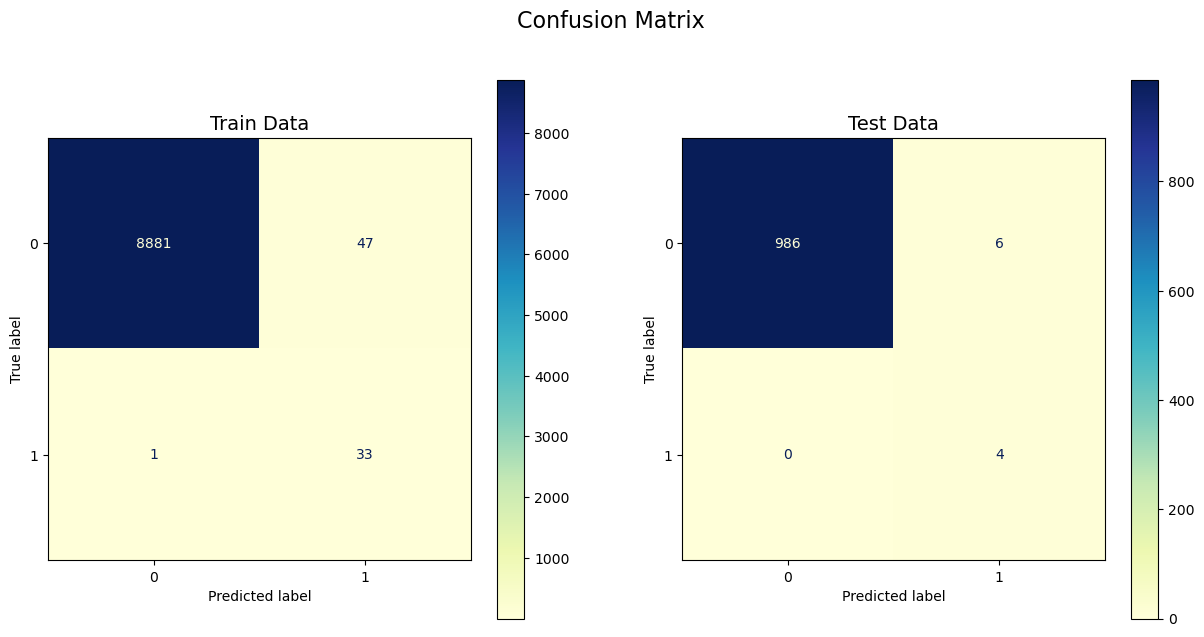

In [108]:
#plotting confusion matrix of test and train data
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=False, figsize=(15, 7))
plot_confusion_matrix(estimator=naive, X=X_train, y_true=y_train, values_format='.5g', cmap='YlGnBu', ax=ax1)
plot_confusion_matrix(estimator=naive, X=X_test, y_true=y_test, values_format='.5g', cmap='YlGnBu', ax=ax2)
ax1.set_title(label='Train Data', size=14)
ax2.set_title(label='Test Data', size=14)
ax1.grid(b=False)
ax2.grid(b=False)
plt.suptitle(t='Confusion Matrix', size=16)
plt.show()



In [ ]:
# In the train dataset:-
  # True negative are 8881, False Negative are 47, False positive is 1 and True positive i.e. true fraudulant
    #customers are 33. 
    
#In test dataset:-
  # True negative are 986, false negative are 6, false positive are 0 and true positive i.e. true fraudulant
    # customers are 4.

In [109]:
train_report = classification_report(y_train, y_pred_train)
test_report = classification_report(y_test, y_pred_test)
print('                    Training Report          ')
print(train_report)
print('                    Testing Report           ')
print(test_report)

#The difference between the training and test dataset accuracy score is <5%. Thus the model is fitted well on test data.

                    Training Report          
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      8928
           1       0.41      0.97      0.58        34

    accuracy                           0.99      8962
   macro avg       0.71      0.98      0.79      8962
weighted avg       1.00      0.99      1.00      8962

                    Testing Report           
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       992
           1       0.40      1.00      0.57         4

    accuracy                           0.99       996
   macro avg       0.70      1.00      0.78       996
weighted avg       1.00      0.99      1.00       996



In [ ]:
#9. Conclusion

# We can see that model is working pretty well in identifying fraudulant customers.
#This model now can help us in identifying which customer is farud and which one is not.